**📊 Análise de Dados Educacionais: Média de Horas-Aula Diária — INEP 2024**

Neste trabalho, utilizamos um conjunto de dados do INEP referente à Média de Horas-Aula Diária das etapas da Educação Básica no Brasil. Exploramos dados de 2024 organizados por unidade da federação, zona (urbana/rural) e tipo de rede (pública ou privada). O objetivo foi aplicar técnicas de ciência de dados com Python para preparar, analisar e exportar esse conjunto de dados para visualização no Power BI.



**🗂️ 1. Leitura do Arquivo com Pandas**

Primeiramente, realizamos a leitura do arquivo Excel, que possui cabeçalhos técnicos nas primeiras linhas. Por isso, usamos skiprows=8 para pular as linhas iniciais que não fazem parte dos dados.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo Excel local
df = pd.read_excel(r'C:\Users\Home\Downloads\teste\dataset\HAD_BRASIL_REGIOES_UFS_2024.xlsx', skiprows=8)
print(df.head())

  NU_ANO_CENSO UNIDGEO NO_CATEGORIA NO_DEPENDENCIA  ED_INF_CAT_0  CRE_CAT_0  \
0         2024  Brasil        Total          Total           6.2        7.6   
1         2024  Brasil       Urbana          Total           6.4        7.8   
2         2024  Brasil        Rural          Total           5.0        5.7   
3         2024  Brasil        Total        Federal           6.1        6.7   
4         2024  Brasil       Urbana        Federal           6.3        6.9   

   PRE_CAT_0  FUN_CAT_0  FUN_AI_CAT_0  FUN_AF_CAT_0  ...  FUN_06_CAT_0  \
0        5.1        5.1           5.0           5.3  ...           5.3   
1        5.2        5.2           5.0           5.4  ...           5.4   
2        4.7        5.1           5.0           5.3  ...           5.2   
3        5.8        5.1           4.8           5.2  ...           5.2   
4        5.9        5.1           4.8           5.2  ...           5.2   

   FUN_07_CAT_0  FUN_08_CAT_0  FUN_09_CAT_0  MED_CAT_0  MED_01_CAT_0  \
0       

c:\Users\Home\Downloads\teste\venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [96]:
df

,NU_ANO_CENSO,UNIDGEO,NO_CATEGORIA,NO_DEPENDENCIA,ED_INF_CAT_0,CRE_CAT_0,PRE_CAT_0,FUN_CAT_0,FUN_AI_CAT_0,FUN_AF_CAT_0,...,FUN_06_CAT_0,FUN_07_CAT_0,FUN_08_CAT_0,FUN_09_CAT_0,MED_CAT_0,MED_01_CAT_0,MED_02_CAT_0,MED_03_CAT_0,MED_04_CAT_0,MED_NS_CAT_0
0,2024,Brasil,Total,Total,6.2,7.6,5.1,5.1,5.0,5.3,...,5.3,5.3,5.4,5.4,5.8,6.0,5.8,5.6,5.2,4.7
1,2024,Brasil,Urbana,Total,6.4,7.8,5.2,5.2,5.0,5.4,...,5.4,5.3,5.4,5.4,5.8,6.0,5.8,5.6,4.8,4.6
2,2024,Brasil,Rural,Total,5.0,5.7,4.7,5.1,5.0,5.3,...,5.2,5.2,5.4,5.4,5.8,6.1,5.7,5.6,8.7,5.0
3,2024,Brasil,Total,Federal,6.1,6.7,5.8,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.5,7.7,7.7,7.6,5.4,6.2
4,2024,Brasil,Urbana,Federal,6.3,6.9,5.9,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.3,7.5,7.5,7.4,5.4,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2024,Distrito Federal,Urbana,Pública,5.1,7.9,5.1,5.4,5.4,5.4,...,5.4,5.4,5.4,5.3,5.2,5.2,5.2,5.2,NaN,5.0
587,2024,Distrito Federal,Rural,Pública,5.7,7.3,5.7,5.8,6.1,5.4,...,5.5,5.4,5.4,5.3,5.8,5.9,5.7,5.8,NaN,NaN
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,Fonte: Censo da Educação Básica 2024/INEP.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**🔤 2. Renomeação de Colunas**

As colunas originais do INEP têm nomes técnicos. Para facilitar a leitura, renomeamos as colunas com nomes mais intuitivos e organizados:

In [97]:
df.rename(columns={
    'NU_ANO_CENSO': 'Ano',
    'UNIDGEO': 'Localidade',
    'NO_CATEGORIA': 'Zona',
    'NO_DEPENDENCIA': 'Rede',
    
    'ED_INF_CAT_0': 'Ed_Infantil_Total',
    'CRE_CAT_0': 'Creche_Total',
    'PRE_CAT_0': 'Pre_Escola_Total',

    'FUN_CAT_0': 'Fundamental_Total',
    'FUN_AI_CAT_0': 'Fundamental_AI',
    'FUN_AF_CAT_0': 'Fundamental_AF',

    'FUN_06_CAT_0': 'Fundamental_6ano',
    'FUN_07_CAT_0': 'Fundamental_7ano',
    'FUN_08_CAT_0': 'Fundamental_8ano',
    'FUN_09_CAT_0': 'Fundamental_9ano',
    
    'FUN_01_CAT_0': 'Fundamental_1ano',
    'FUN_02_CAT_0': 'Fundamental_2ano',
    'FUN_03_CAT_0': 'Fundamental_3ano',
    'FUN_04_CAT_0': 'Fundamental_4ano',
    'FUN_05_CAT_0': 'Fundamental_5ano',

    'MED_CAT_0': 'Medio_Total',
    'MED_01_CAT_0': 'Medio_1ano',
    'MED_02_CAT_0': 'Medio_2ano',
    'MED_03_CAT_0': 'Medio_3ano',
    'MED_04_CAT_0': 'Medio_4ano',
    'MED_NS_CAT_0': 'Medio_Nao_Seriado'
}, inplace=True)

print(df.columns.tolist())


['Ano', 'Localidade', 'Zona', 'Rede', 'Ed_Infantil_Total', 'Creche_Total', 'Pre_Escola_Total', 'Fundamental_Total', 'Fundamental_AI', 'Fundamental_AF', 'Fundamental_1ano', 'Fundamental_2ano', 'Fundamental_3ano', 'Fundamental_4ano', 'Fundamental_5ano', 'Fundamental_6ano', 'Fundamental_7ano', 'Fundamental_8ano', 'Fundamental_9ano', 'Medio_Total', 'Medio_1ano', 'Medio_2ano', 'Medio_3ano', 'Medio_4ano', 'Medio_Nao_Seriado']


In [99]:
df

,Ano,Localidade,Zona,Rede,Ed_Infantil_Total,Creche_Total,Pre_Escola_Total,Fundamental_Total,Fundamental_AI,Fundamental_AF,...,Fundamental_6ano,Fundamental_7ano,Fundamental_8ano,Fundamental_9ano,Medio_Total,Medio_1ano,Medio_2ano,Medio_3ano,Medio_4ano,Medio_Nao_Seriado
0,2024,Brasil,Total,Total,6.2,7.6,5.1,5.1,5.0,5.3,...,5.3,5.3,5.4,5.4,5.8,6.0,5.8,5.6,5.2,4.7
1,2024,Brasil,Urbana,Total,6.4,7.8,5.2,5.2,5.0,5.4,...,5.4,5.3,5.4,5.4,5.8,6.0,5.8,5.6,4.8,4.6
2,2024,Brasil,Rural,Total,5.0,5.7,4.7,5.1,5.0,5.3,...,5.2,5.2,5.4,5.4,5.8,6.1,5.7,5.6,8.7,5.0
3,2024,Brasil,Total,Federal,6.1,6.7,5.8,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.5,7.7,7.7,7.6,5.4,6.2
4,2024,Brasil,Urbana,Federal,6.3,6.9,5.9,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.3,7.5,7.5,7.4,5.4,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2024,Distrito Federal,Urbana,Pública,5.1,7.9,5.1,5.4,5.4,5.4,...,5.4,5.4,5.4,5.3,5.2,5.2,5.2,5.2,NaN,5.0
587,2024,Distrito Federal,Rural,Pública,5.7,7.3,5.7,5.8,6.1,5.4,...,5.5,5.4,5.4,5.3,5.8,5.9,5.7,5.8,NaN,NaN
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,Fonte: Censo da Educação Básica 2024/INEP.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**🧼 3. Limpeza e Tratamento de Dados (Data Wrangling)**

Selecionamos apenas as colunas numéricas (valores de horas-aula), ignorando colunas de texto. Depois, transformamos os dados para o tipo numérico e preenchemos os valores faltantes com a média da coluna correspondente. Por fim, arredondamos os dados.

In [122]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado `df`

# Converter a coluna 'Ano' para numérica, forçando valores não numéricos a se tornarem NaN
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Preenchendo valores nulos na coluna numérica 'Ano' com a média
df['Ano'] = df['Ano'].fillna(df['Ano'].mean())

# Preenchendo valores nulos nas colunas categóricas com a moda (valor mais frequente)
categorical_columns = ['Localidade', 'Zona', 'Rede']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verifica se todos os valores nulos foram preenchidos
print(df.isnull().sum())

# Exibe as primeiras linhas para confirmar
print(df.head())

Ano                  0
Localidade           0
Zona                 0
Rede                 0
Ed_Infantil_Total    0
Creche_Total         0
Pre_Escola_Total     0
Fundamental_Total    0
Fundamental_AI       0
Fundamental_AF       0
Fundamental_1ano     0
Fundamental_2ano     0
Fundamental_3ano     0
Fundamental_4ano     0
Fundamental_5ano     0
Fundamental_6ano     0
Fundamental_7ano     0
Fundamental_8ano     0
Fundamental_9ano     0
Medio_Total          0
Medio_1ano           0
Medio_2ano           0
Medio_3ano           0
Medio_4ano           0
Medio_Nao_Seriado    0
dtype: int64
      Ano Localidade    Zona     Rede  Ed_Infantil_Total  Creche_Total  \
0  2024.0     Brasil   Total    Total                6.0           8.0   
1  2024.0     Brasil  Urbana    Total                6.0           8.0   
2  2024.0     Brasil   Rural    Total                5.0           6.0   
3  2024.0     Brasil   Total  Federal                6.0           7.0   
4  2024.0     Brasil  Urbana  Federal     

In [123]:
df

,Ano,Localidade,Zona,Rede,Ed_Infantil_Total,Creche_Total,Pre_Escola_Total,Fundamental_Total,Fundamental_AI,Fundamental_AF,...,Fundamental_6ano,Fundamental_7ano,Fundamental_8ano,Fundamental_9ano,Medio_Total,Medio_1ano,Medio_2ano,Medio_3ano,Medio_4ano,Medio_Nao_Seriado
0,2024.0,Brasil,Total,Total,6.0,8.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0
1,2024.0,Brasil,Urbana,Total,6.0,8.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0
2,2024.0,Brasil,Rural,Total,5.0,6.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,9.0,5.0
3,2024.0,Brasil,Total,Federal,6.0,7.0,6.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,8.0,8.0,8.0,8.0,5.0,6.0
4,2024.0,Brasil,Urbana,Federal,6.0,7.0,6.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,7.0,8.0,8.0,7.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2024.0,Distrito Federal,Urbana,Pública,5.0,8.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0
587,2024.0,Distrito Federal,Rural,Pública,6.0,7.0,6.0,6.0,6.0,5.0,...,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0
588,2024.0,Amazonas,Total,Estadual,6.0,7.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0
589,2024.0,Amazonas,Total,Estadual,6.0,7.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0


**📋 4. Análise Geral com info() e describe()**

As funções info() e describe() nos ajudam a verificar se os dados estão consistentes e fornecem uma visão estatística inicial.

In [124]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano                591 non-null    float64
 1   Localidade         591 non-null    object 
 2   Zona               591 non-null    object 
 3   Rede               591 non-null    object 
 4   Ed_Infantil_Total  591 non-null    float64
 5   Creche_Total       591 non-null    float64
 6   Pre_Escola_Total   591 non-null    float64
 7   Fundamental_Total  591 non-null    float64
 8   Fundamental_AI     591 non-null    float64
 9   Fundamental_AF     591 non-null    float64
 10  Fundamental_1ano   591 non-null    float64
 11  Fundamental_2ano   591 non-null    float64
 12  Fundamental_3ano   591 non-null    float64
 13  Fundamental_4ano   591 non-null    float64
 14  Fundamental_5ano   591 non-null    float64
 15  Fundamental_6ano   591 non-null    float64
 16  Fundamental_7ano   591 non

**📊 5. Agregações com groupby**

Utilizando groupby, analisamos a média da carga horária diária do 5º ano do Ensino Fundamental por estado (Localidade):

In [126]:
df_agregado = df.groupby('Localidade')['Fundamental_5ano'].mean().reset_index()
print(df_agregado)

             Localidade  Fundamental_5ano
0                  Acre          4.647059
1               Alagoas          5.352941
2                 Amapá          5.000000
3              Amazonas          4.380952
4                 Bahia          4.722222
5                Brasil          5.000000
6                 Ceará          5.277778
7          Centro-Oeste          5.166667
8      Distrito Federal          5.266667
9        Espírito Santo          5.000000
10                Goiás          4.777778
11             Maranhão          5.222222
12          Mato Grosso          4.722222
13   Mato Grosso do Sul          5.611111
14         Minas Gerais          5.000000
15             Nordeste          5.166667
16                Norte          4.777778
17               Paraná          4.666667
18              Paraíba          5.055556
19                 Pará          4.833333
20           Pernambuco          4.777778
21                Piauí          5.611111
22  Rio Grande do Norte          4

In [127]:
media_fund5_por_rede = df.groupby('Rede')['Fundamental_5ano'].mean().round(2)
print(media_fund5_por_rede)

Rede
Estadual     4.92
Federal      4.94
Municipal    5.15
Privada      4.63
Pública      5.15
Total        5.02
Name: Fundamental_5ano, dtype: float64


**📈 6. Visualizações: Comparação entre Rede Pública e Privada**

Com matplotlib, criamos um gráfico de barras para destacar visualmente a diferença de horas-aula no 5º ano entre as redes:

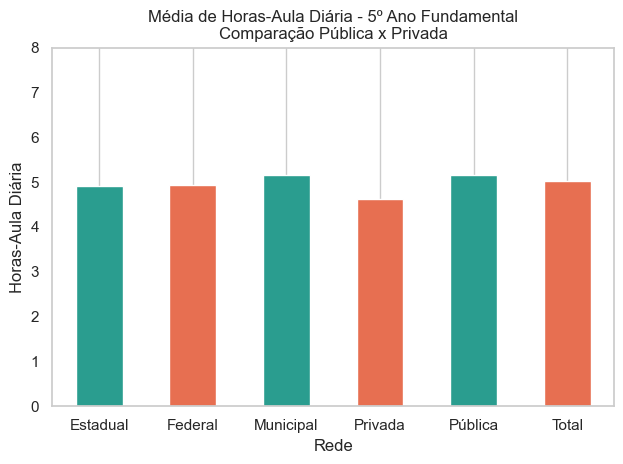

In [129]:
media_fund5_por_rede.plot(kind='bar', color=['#2a9d8f', '#e76f51'])
plt.title('Média de Horas-Aula Diária - 5º Ano Fundamental\nComparação Pública x Privada')
plt.ylabel('Horas-Aula Diária')
plt.xlabel('Rede')
plt.ylim(0, 8)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**💾 7. Exportação para Power BI**

Com os dados limpos e prontos para análise, exportamos o DataFrame tratado para um arquivo .csv, que pode ser carregado diretamente no Power BI:

In [130]:
df.to_csv('dados_had_tratados.csv', index=False, encoding='utf-8-sig')